# Generating Figure 4 in our paper


In [1]:
import scipy.special as sc
import numpy as np
from statsmodels.stats.proportion import proportion_confint
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy
import seaborn as sns
import pandas as pd

## Figure 4 (a)

In [2]:
d=3000
sigma=0.12
gx1=np.linspace(0.5,1,100)
gx2=np.linspace(0.95,1,100)
gx3=np.linspace(0.9995,1,100)
gx=np.concatenate((gx1,gx2))
gx=np.concatenate((gx,gx3))

In [3]:
result={}
result['gx']=gx

In [4]:
result['Our Upper Bound (Eq. 10)']=5/d**0.5*sigma*(2*scipy.stats.gamma.ppf(gx/(1-5e-7), a=d/2, scale=1))**0.5

result_3=sigma*4*(np.sqrt(np.log(1/(1-gx))))
result_5=sigma/2**0.5*(np.sqrt(1/(1-gx)))
result['Kumar\'s Bound']=np.minimum(result_3,result_5)
result['Hayes\' Bound']=sigma*np.sqrt(-np.log(2*np.sqrt(gx*(1-gx))))

result['Certified Radius']=sigma*scipy.stats.norm.ppf(gx)
df = pd.DataFrame(data=result,)
df=df.set_index('gx')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


[Text(0, 0.5, 'Radius'), Text(0.5, 0, 'g(x)')]

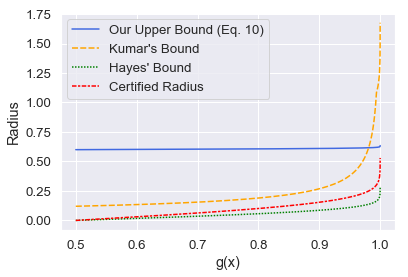

In [5]:
sns.set_style("whitegrid")
sns.set(font_scale=1.2)
ax=sns.lineplot(data=df,palette=['royalblue','orange','green','red'])
ax.set(xlabel='g(x)', ylabel='Radius')

## Figure 4 (b)

In [6]:
gx=0.999
sigma=0.12
inputs_1=np.linspace(10000,50000,100)
inputs_2=np.linspace(50000,100000,100)
inputs_3=np.linspace(100000,10000000,100)
inputs = np.concatenate((inputs_1,inputs_2))
d = np.concatenate((inputs,inputs_3))

In [7]:
result={}
result['dimension']=d

In [8]:
result['Our Upper Bound (Eq. 10)']=5/d**0.5*1/d**0.5*(2*scipy.stats.gamma.ppf(gx/(1-5e-7), a=d/2, scale=1))**0.5
result['Our Upper Bound (Eq. 10)']=np.log(result['Our Upper Bound (Eq. 10)'])

result_3=1/d**0.5*4*(np.sqrt(np.log(1/(1-gx))))
result_5=1/d**0.5/2**0.5*(np.sqrt(1/(1-gx)))
result['Kumar\'s Bound']=np.minimum(result_3,result_5)
result['Kumar\'s Bound']=np.log(result['Kumar\'s Bound'])
result['Hayes\' Bound']=1/d**0.5*np.sqrt(-np.log(2*np.sqrt(gx*(1-gx))))
result['Hayes\' Bound']=np.log(result['Hayes\' Bound'])

result['Certified Radius']=1/d**0.5*scipy.stats.norm.ppf(gx)
result['Certified Radius']=np.log(result['Certified Radius'])
# result=np.log(result)
df2 = pd.DataFrame(data=result,)
df2=df2.set_index('dimension')

[Text(0, 0.5, 'Log of Radius'), Text(0.5, 0, 'Dimension')]

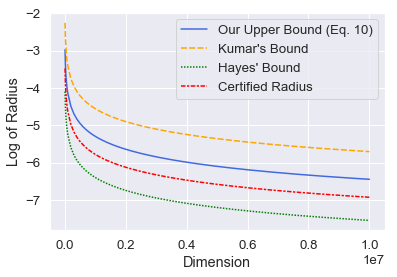

In [9]:
sns.set_style("whitegrid")
sns.set(font_scale=1.2)
ax=sns.lineplot(data=df2,palette=['royalblue','orange','green','red'])
ax.set(xlabel='Dimension', ylabel='Log of Radius')

## Figure 4 (c)

In [10]:
gx=0.999
d=3000
inputs_1=np.linspace(0,5000,100)
inputs_2=np.linspace(5000,100000,100)
inputs_3=np.linspace(100000,10000000,100)
inputs = np.concatenate((inputs_1,inputs_2))
# d = np.concatenate((inputs,inputs_3))
sigma = np.linspace(0,1,1000)

In [11]:
result={}
result['sigma']=sigma

In [12]:
result['Our Upper Bound (Eq. 10)']=5/d**0.5*sigma*(2*scipy.stats.gamma.ppf(gx/(1-5e-7), a=d/2, scale=1))**0.5

result_3=sigma*4*(np.sqrt(np.log(1/(1-gx))))

result_5=sigma/2**0.5*(np.sqrt(1/(1-gx)))
result['Kumar\'s Bound']=np.minimum(result_3,result_5)
result['Hayes\' Bound']=sigma*np.sqrt(-np.log(2*np.sqrt(gx*(1-gx))))
result['Certified Radius']=sigma*scipy.stats.norm.ppf(gx)
df3 = pd.DataFrame(data=result,)
df3=df3.set_index('sigma')

[Text(0, 0.5, 'Radius'), Text(0.5, 0, 'Sigma')]

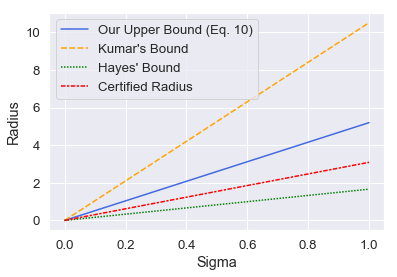

In [13]:
sns.set_style("whitegrid")
sns.set(font_scale=1.2)

ax=sns.lineplot(data=df3,palette=['royalblue','orange','green','red'])
ax.set(xlabel='Sigma', ylabel='Radius')